In [1]:
import importlib
import os
import sys
from pathlib import Path
from typing import Dict, List, Literal, Tuple, Union

import IPython
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

notebook_path = Path(IPython.extract_module_locals()[1]["__vsc_ipynb_file__"])
project_dir = notebook_path.parent.parent
sys.path.append(str(project_dir))
import src.utils.custom_log as custom_log
import src.visualization.validity_chain.SinglePlot as SinglePlot
from src.utils.Csv import Csv

os.chdir(project_dir)
log = custom_log.init_logger(log_lvl=10, start_msg=f"Start in {Path().cwd()}")

c:\Users\plaschkies\Documents\Py_Projects\aihiii


2023-12-04 08:21:56,165 MainProcess  - MainThread      INFO  Start in c:\Users\plaschkies\Documents\Py_Projects\aihiii || custom_log.py


In [3]:
# read
csv = Csv(csv_path=project_dir / "data" / "validity_chain_cfc60" / "extracted_cfc60", log=log, compress=True)
db: pd.DataFrame = csv.read()

display(db)

2023-12-04 08:23:08,862 MainProcess  - MainThread      DEBUG CSV file without suffix is c:\Users\plaschkies\Documents\Py_Projects\aihiii\data\validity_chain_cfc60\extracted_cfc60, Compress True || Csv.py
2023-12-04 08:23:08,867 MainProcess  - MainThread      DEBUG CSV file is c:\Users\plaschkies\Documents\Py_Projects\aihiii\data\validity_chain_cfc60\extracted_cfc60.csv.zip || Csv.py
2023-12-04 08:23:08,873 MainProcess  - MainThread      DEBUG Read c:\Users\plaschkies\Documents\Py_Projects\aihiii\data\validity_chain_cfc60\extracted_cfc60.csv.zip || Csv.py
c:\Users\plaschkies\Documents\Py_Projects\aihiii\src\utils\Csv.py:97: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(self.csv_path, index_col=0, dtype=dtype, sep=delimiter)


,Value,Time,Channel,Source,Case,Assembly,Configuration,Side
0,-0.0454,1.0,00COG00000VH00ACXC,CAE NHTSA,Full Frontal,NaN,NaN,NaN
1,0.2117,2.0,00COG00000VH00ACXC,CAE NHTSA,Full Frontal,NaN,NaN,NaN
2,0.4767,3.0,00COG00000VH00ACXC,CAE NHTSA,Full Frontal,NaN,NaN,NaN
3,0.6952,4.0,00COG00000VH00ACXC,CAE NHTSA,Full Frontal,NaN,NaN,NaN
4,0.6031,5.0,00COG00000VH00ACXC,CAE NHTSA,Full Frontal,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3143985,1.0662,139.6,00COG00000VH00VERC,CAE THI,Oblique Right,Assemblies_3,Honda_Accord_2014_Sled_with_HIII_RuntimeMin,PA
3143986,1.0662,139.7,00COG00000VH00VERC,CAE THI,Oblique Right,Assemblies_3,Honda_Accord_2014_Sled_with_HIII_RuntimeMin,PA
3143987,1.0662,139.8,00COG00000VH00VERC,CAE THI,Oblique Right,Assemblies_3,Honda_Accord_2014_Sled_with_HIII_RuntimeMin,PA
3143988,1.0662,139.9,00COG00000VH00VERC,CAE THI,Oblique Right,Assemblies_3,Honda_Accord_2014_Sled_with_HIII_RuntimeMin,PA


In [4]:
for ch in sorted(db["Channel"].unique()):
    print(ch)

00COG00000VH00ACRC
00COG00000VH00ACXC
00COG00000VH00ACYC
00COG00000VH00VERC
00COG00000VH00VEXC
00COG00000VH00VEYC
00FRONT000VH00DSRC
01BELTB300H350FORC
01BELTB300TH50FORC
01FEMRLE00H350FORC
01FEMRLE00TH50FORC
01FEMRRI00H350FORC
01FEMRRI00TH50FORC
01HEAD0000H350ACRC
01HEAD0000H350ACXC
01HEAD0000H350ACYC
01HEAD0000H350ACZC
01HEAD0000TH50ACRC
01HEAD0000TH50ACXC
01HEAD0000TH50ACYC
01HEAD0000TH50ACZC
01PELV0000H350ACRC
01PELV0000H350ACXC
01PELV0000H350ACYC
01PELV0000H350ACZC
01PELV0000TH50ACRC
01PELV0000TH50ACXC
01PELV0000TH50ACYC
01PELV0000TH50ACZC
03BELTB300H350FORC
03BELTB300TH50FORC
03FEMRLE00H350FORC
03FEMRLE00TH50FORC
03FEMRRI00H350FORC
03FEMRRI00TH50FORC
03HEAD0000H350ACRC
03HEAD0000H350ACXC
03HEAD0000H350ACYC
03HEAD0000H350ACZC
03HEAD0000TH50ACRC
03HEAD0000TH50ACXC
03HEAD0000TH50ACYC
03HEAD0000TH50ACZC
03PELV0000H350ACRC
03PELV0000H350ACXC
03PELV0000H350ACYC
03PELV0000H350ACZC
03PELV0000TH50ACRC
03PELV0000TH50ACXC
03PELV0000TH50ACYC
03PELV0000TH50ACZC


In [5]:
for ch in db["Configuration"].unique():
    print(ch)

nan
Honda_Accord_2014_Original
Honda_Accord_2014_Original_THOR_2_7
Honda_Accord_2014_Original_THOR_2_7_Update_PAB
Honda_Accord_2014_Original_with_HIII
Honda_Accord_2014_Sled_THOR_2_7
Honda_Accord_2014_Sled_with_HIII
Honda_Accord_2014_Sled_with_HIII_Rigid_Seat
Honda_Accord_2014_Sled_with_HIII_RuntimeMin


c:\Users\plaschkies\Documents\Py_Projects\aihiii


2023-12-04 08:23:20,853 MainProcess  - MainThread      INFO  START || custom_log.py
2023-12-04 08:23:20,857 MainProcess  - MainThread      INFO  Dataframe shape: (3143990, 8) || SinglePlot.py
2023-12-04 08:23:23,472 MainProcess  - MainThread      DEBUG Filter config Honda_Accord_2014_Original to shape (353052, 8) || SinglePlot.py
2023-12-04 08:23:23,500 MainProcess  - MainThread      DEBUG Filter side PA to shape (353052, 8) || SinglePlot.py
2023-12-04 08:23:23,530 MainProcess  - MainThread      DEBUG Filter case Oblique Left to shape (117684, 8) || SinglePlot.py
2023-12-04 08:23:23,537 MainProcess  - MainThread      DEBUG Channel 03HEAD0000H350ACRC not found in db. Try 03HEAD0000TH50ACRC || SinglePlot.py
2023-12-04 08:23:23,549 MainProcess  - MainThread      DEBUG Filter channel 03HEAD0000TH50ACRC to shape (4203, 8) || SinglePlot.py
2023-12-04 08:23:23,735 MainProcess  - MainThread      DEBUG Filter config Honda_Accord_2014_Original_THOR_2_7 to shape (353052, 8) || SinglePlot.py
2023-

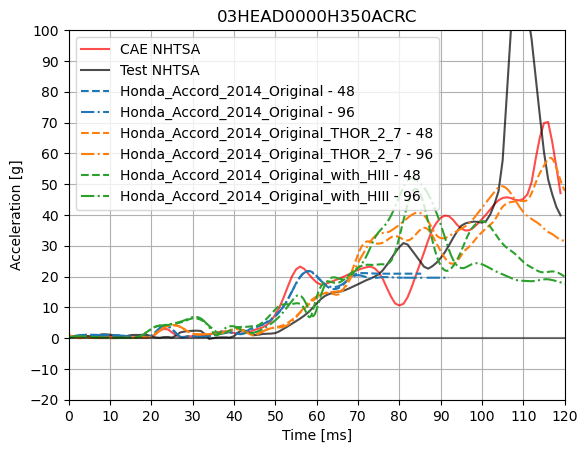

In [6]:
importlib.reload(SinglePlot)

single = SinglePlot.SinglePlot(
    data=db,
    ax=plt.subplots()[1],
    confs=["Honda_Accord_2014_Original", "Honda_Accord_2014_Original_THOR_2_7", "Honda_Accord_2014_Original_with_HIII"],
    ch="03HEAD0000H350ACRC",
    case="Oblique Left",
    side="PA",
)
single.create()

c:\Users\plaschkies\Documents\Py_Projects\aihiii


2023-12-04 08:23:39,138 MainProcess  - MainThread      DEBUG Shape of ax: (4, 2) || 2614157310.py
2023-12-04 08:23:39,143 MainProcess  - MainThread      DEBUG row_i: 0, col_i: 0, channel: 00COG00000VH00VEXC || 2614157310.py
2023-12-04 08:23:39,148 MainProcess  - MainThread      INFO  START || custom_log.py
2023-12-04 08:23:39,154 MainProcess  - MainThread      INFO  Dataframe shape: (3143990, 8) || SinglePlot.py
2023-12-04 08:23:41,751 MainProcess  - MainThread      DEBUG Filter config Honda_Accord_2014_Original to shape (353052, 8) || SinglePlot.py
2023-12-04 08:23:41,778 MainProcess  - MainThread      DEBUG Filter side PA to shape (353052, 8) || SinglePlot.py
2023-12-04 08:23:41,810 MainProcess  - MainThread      DEBUG Filter case Oblique Left to shape (117684, 8) || SinglePlot.py
2023-12-04 08:23:41,819 MainProcess  - MainThread      DEBUG Channel 00COG00000VH00VEXC found in db. || SinglePlot.py
2023-12-04 08:23:41,832 MainProcess  - MainThread      DEBUG Filter channel 00COG00000VH

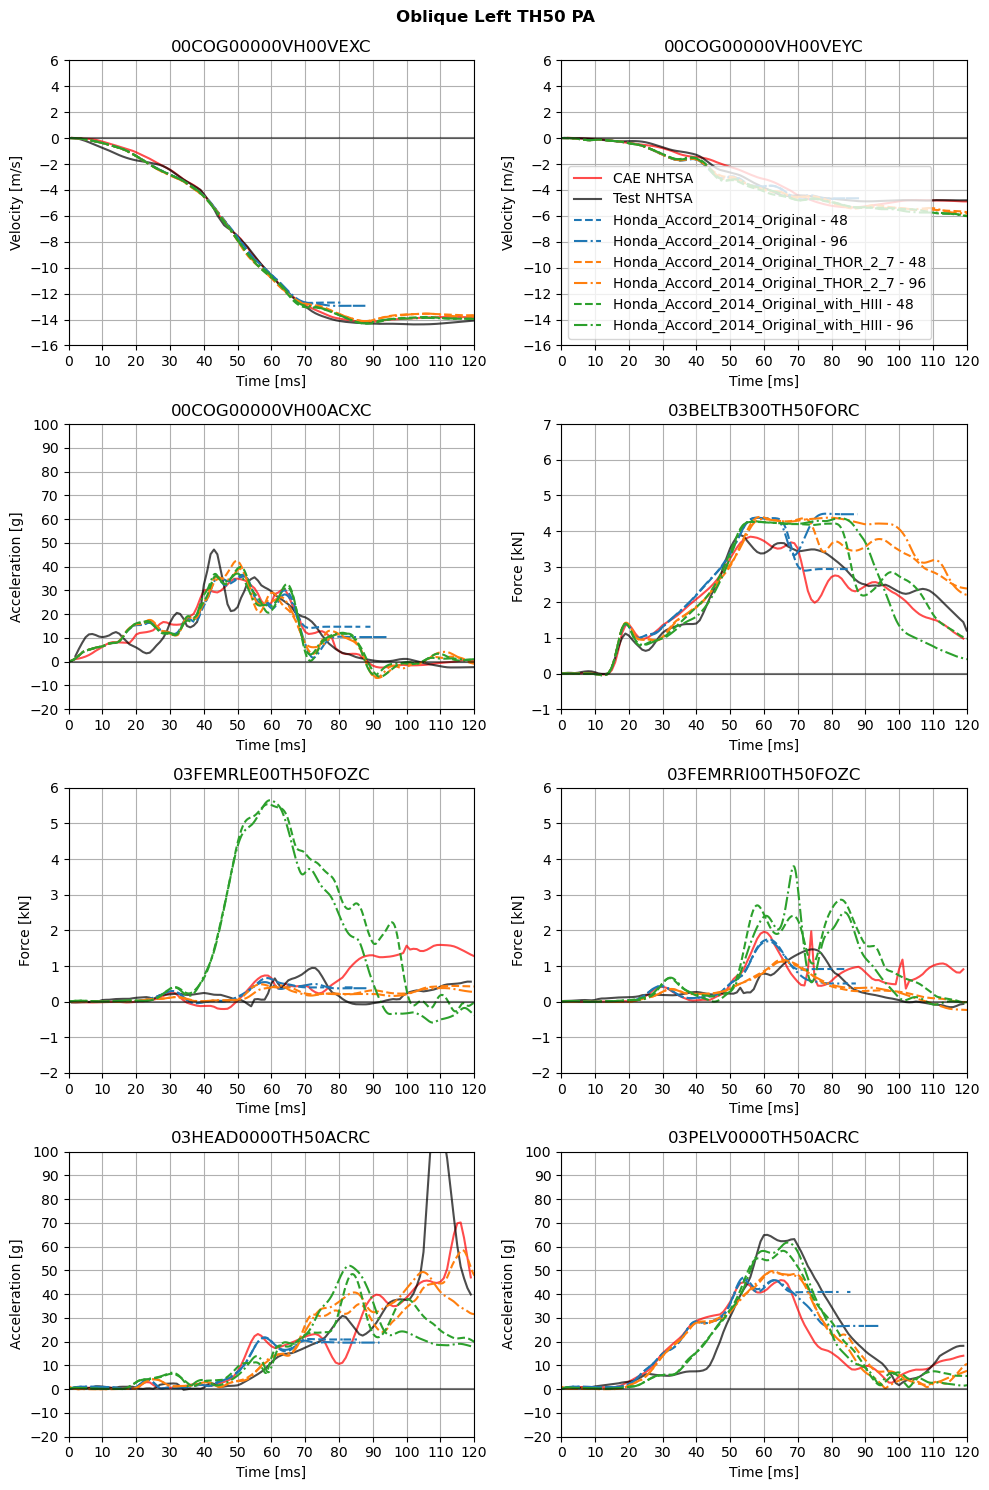

In [7]:
importlib.reload(SinglePlot)

def sim_panel(
    data: pd.DataFrame,
    side: Literal[1, 3],
    configuration: List[str],
    case=Literal["Full Frontal", "Oblique Left", "Oblique Right"],
    store: Literal[False, "png", "pdf", "svg"] = False,
):
    dummy = "TH50" # irrelevant - will be replaced
    channels = [
        ["00COG00000VH00VEXC", "00COG00000VH00VEYC"],
        ["00COG00000VH00ACXC", f"{side:02d}BELTB300{dummy}FORC"],
        [f"{side:02d}FEMRLE00{dummy}FORC", f"{side:02d}FEMRRI00{dummy}FORC"],
        [f"{side:02d}HEAD0000{dummy}ACRC", f"{side:02d}PELV0000{dummy}ACRC"],
    ]
    side_str = {1: "DR", 3: "PA"}[side]

    fig, ax = plt.subplots(*np.array(channels).shape, figsize=(10, 15))
    log.debug("Shape of ax: %s", ax.shape)
    for row_i, line in enumerate(channels):
        for col_i, channel in enumerate(line):
            log.debug("row_i: %s, col_i: %s, channel: %s", row_i, col_i, channel)
            single = SinglePlot.SinglePlot(
                data=data,
                ax=ax[row_i, col_i],
                confs=configuration,
                ch=channel,
                case=case,
                side=side_str,
            )
            single.create()
            if row_i != 0 or col_i != 1:
                ax[row_i, col_i].get_legend().remove()
    fig.suptitle(" ".join([case, dummy, side_str]), weight="bold", y=0.99)
    fig.tight_layout()

    if store:
        store_dir = project_dir / "data" / "validity_chain" / "plots"
        store_dir.mkdir(exist_ok=True)
        suffix = store.strip(".") if isinstance(store, str) else "png"
        fig_name = f"Report2Sim_{case}_{side_str}_{'_'.join(configuration)}.{suffix}"
        log.info("Store %s in %s", fig_name, store_dir)
        fig.savefig(store_dir / fig_name, transparent=True)
        plt.close(fig)


sim_panel(
    data=db,
    side=3,
    configuration=[
        "Honda_Accord_2014_Original",
        "Honda_Accord_2014_Original_THOR_2_7",
        "Honda_Accord_2014_Original_with_HIII",
    ],
    case="Oblique Left",
    store=False,
)

In [ ]:
importlib.reload(SinglePlot)

"""
Honda_Accord_2014_Original
Honda_Accord_2014_Original_THOR_2_7
Honda_Accord_2014_Original_THOR_2_7_Update_PAB
Honda_Accord_2014_Original_with_HIII
Honda_Accord_2014_Sled_THOR_2_7
Honda_Accord_2014_Sled_with_HIII
Honda_Accord_2014_Sled_with_HIII_Rigid_Seat
"""


def run_loop(data: pd.DataFrame):

    configs = [
        ["Honda_Accord_2014_Original", "Honda_Accord_2014_Original_THOR_2_7"],
        ["Honda_Accord_2014_Original_THOR_2_7", "Honda_Accord_2014_Original_THOR_2_7_Update_PAB"],
        ["Honda_Accord_2014_Original_THOR_2_7", "Honda_Accord_2014_Original_with_HIII"],
        ["Honda_Accord_2014_Original_THOR_2_7", "Honda_Accord_2014_Sled_THOR_2_7"],
        ["Honda_Accord_2014_Original_with_HIII", "Honda_Accord_2014_Sled_with_HIII"],
        ["Honda_Accord_2014_Sled_THOR_2_7", "Honda_Accord_2014_Sled_with_HIII"]
        ["Honda_Accord_2014_Sled_with_HIII", "Honda_Accord_2014_Sled_with_HIII_Rigid_Seat"],
        ["Honda_Accord_2014_Original", "Honda_Accord_2014_Sled_with_HIII_Rigid_Seat"],
    ]


    for case in ["Oblique Right", "Oblique Left", "Full Frontal"]:

        for side in [1, 3]:
            for conf in configs:
                sim_panel(data=data, side=side, configuration=conf, case=case, store="png")



run_loop(data=db)

In [ ]:
import matplotlib.colors as mcolors
mcolors.TABLEAU_COLORS.values()